In [911]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow.keras.datasets import mnist # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Flatten # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore

tf.__version__

'2.18.0'

In [912]:
EPOCHS = 200
batch_size= 32

In [913]:
df = pd.read_csv('Pokemon.csv')

In [914]:
# df.info()
encoder = OneHotEncoder(sparse_output=False)
onehot = encoder.fit_transform(df[['Type 1', 'Type 2']])

In [915]:
onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0.])

In [916]:
column_names = encoder.get_feature_names_out(['Type 1', 'Type 2'])
encoded_df = pd.DataFrame(onehot, columns=column_names)
result = pd.concat([df, encoded_df], axis=1)
nome = result['Name']
df_y = result[['Type 1_Bug', 'Type 1_Dark','Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy','Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost','Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal','Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel','Type 1_Water']]

In [917]:
df_y.head()

,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [918]:
result.drop(["Type 1", "Type 2", 'Name', 'Total','#','Type 1_Bug', 'Type 1_Dark','Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy','Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost','Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal','Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel','Type 1_Water'], axis=1,  inplace=True)

In [919]:
dict_m ={False: 0, True: 1}
result['Legendary'] = result['Legendary'].map(dict_m)

In [920]:
for col in result.columns.values:
    result[col] = result[col]/result[col].max()

In [921]:
result.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 2_Bug,Type 2_Dark,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Type 2_nan
0,0.176471,0.257895,0.213043,0.335052,0.282609,0.250000,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.235294,0.326316,0.273913,0.412371,0.347826,0.333333,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.313725,0.431579,0.360870,0.515464,0.434783,0.444444,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.313725,0.526316,0.534783,0.628866,0.521739,0.444444,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.152941,0.273684,0.186957,0.309278,0.217391,0.361111,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [922]:
size_input = len(result.columns.values)
size_input

27

In [923]:
len_classi = len(df_y.columns.values)
len_classi

18

In [924]:
X  = result.to_numpy()
y = df_y.to_numpy()
X.astype('float')
y.astype('float')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [925]:
X[0],y[0]

(array([0.17647059, 0.25789474, 0.21304348, 0.33505155, 0.2826087 ,
        0.25      , 0.16666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.]))

In [926]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [927]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [928]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)

In [929]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(size_input,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(len_classi, activation='softmax'))

/home/danie/anaconda3/envs/py311/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [930]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',
              metrics=['accuracy'] )

In [931]:
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 256)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,386 (165.57 KB)

 Trainable params: 42,386 (165.57 KB)

 Non-trainable params: 0 (0.00 B)

In [932]:
checkpoint_path = "model/pokemon_model.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [933]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [934]:
history = model.fit(train_dataset, epochs=EPOCHS,
                      validation_data=test_dataset,
                      callbacks=[cp_callback])

Epoch 1/200
 1/18 ━━━━━━━━━━━━━━━━━━━━ 6s 374ms/step - accuracy: 0.0312 - loss: 2.8833
Epoch 1: saving model to model/pokemon_model.weights.h5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0590 - loss: 2.8804 - val_accuracy: 0.1208 - val_loss: 2.8571
Epoch 2/200
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1250 - loss: 2.8623
Epoch 2: saving model to model/pokemon_model.weights.h5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1376 - loss: 2.8589 - val_accuracy: 0.1542 - val_loss: 2.8410
Epoch 3/200
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1562 - loss: 2.8465
Epoch 3: saving model to model/pokemon_model.weights.h5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1452 - loss: 2.8404 - val_accuracy: 0.1500 - val_loss: 2.8256
Epoch 4/200
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1562 - loss: 2.8318
Epoch 4: saving model to model/pokemon_model.weights.h5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1452 - loss: 2.8227 - val_accuracy: 

In [935]:
def plot_history(history):
    key = list(history.history.keys())
    plt.figure(1, figsize=(16,9))
    plt.subplot(1, 2, 1)
    plt.plot(history.history[key[0]])
    plt.plot(history.history[key[2]])
    plt.title("Comparazione "+ str(key[0]))
    plt.legend([key[0], key[2]])
    plt.xlabel("epochs")
    plt.ylabel(str(key[0]))

    # Creare la seconda figura
    plt.subplot(1, 2, 2)
    plt.plot(history.history[key[1]])
    plt.plot(history.history[key[3]])
    plt.title("Comparazione "+ str(key[1]))
    plt.legend([key[1], key[3]])
    plt.xlabel("epochs")
    plt.ylabel(str(key[1]))

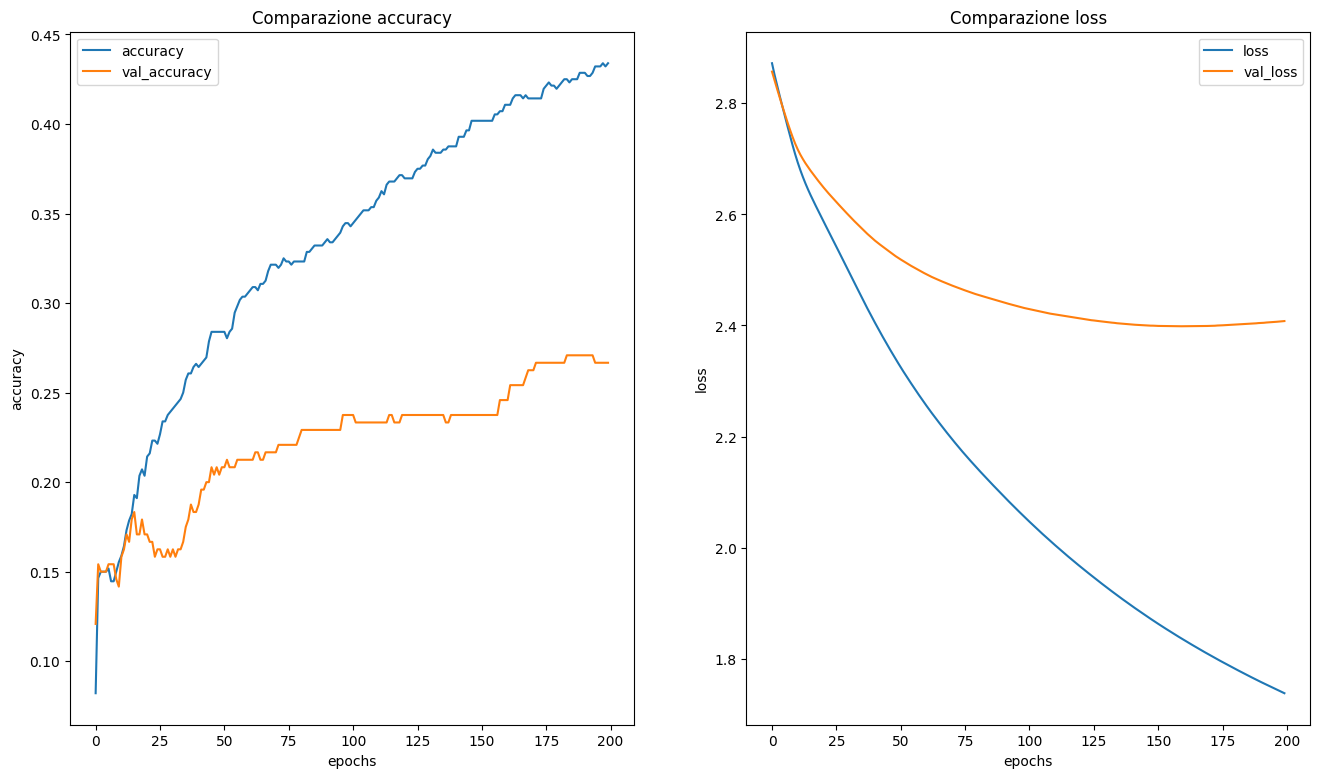

In [936]:
plot_history(history)

In [937]:
predictions = model.predict(X_test)
print(predictions[0])
print(df_y.columns.values[np.argmax(predictions[0], axis=0)])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[0.00562726 0.23380262 0.01432921 0.00711959 0.00303175 0.00849737
 0.02996064 0.03108289 0.08421953 0.03989256 0.00483366 0.02051478
 0.00117067 0.00539611 0.00744451 0.08356072 0.0150633  0.40445274]
Type 1_Water
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step


In [938]:
checkpoint_path = "model/pokemon_model.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
model2 = Sequential()
model2.add(Dense(256, activation='relu', input_shape=(size_input,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(len_classi, activation='softmax'))
model2.load_weights(checkpoint_path)
predictions = model2.predict(X_test)
print(predictions[0])
print(df_y.columns.values[np.argmax(predictions[0], axis=0)])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

predictions = model2.predict(X_test)



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[0.00562726 0.23380262 0.01432921 0.00711959 0.00303175 0.00849737
 0.02996064 0.03108289 0.08421953 0.03989256 0.00483366 0.02051478
 0.00117067 0.00539611 0.00744451 0.08356072 0.0150633  0.40445274]
Type 1_Water
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
